# Lab 7  :  Implement Random Forest algorithm

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\ecommerce.csv")

In [3]:
df.head()

,customer_age,gender,pages_viewed,time_on_site,device_type,made_purchase
0,50,0,32,7.80,0,0
1,50,0,45,13.79,1,1
2,68,0,47,4.31,0,0
3,60,0,21,28.64,0,0
4,54,1,16,18.38,0,0


In [4]:
df.shape

(100, 6)

In [5]:
df.columns

Index(['customer_age', 'gender', 'pages_viewed', 'time_on_site', 'device_type',
       'made_purchase'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_age   100 non-null    int64  
 1   gender         100 non-null    int64  
 2   pages_viewed   100 non-null    int64  
 3   time_on_site   100 non-null    float64
 4   device_type    100 non-null    int64  
 5   made_purchase  100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


In [7]:
df.describe()

,customer_age,gender,pages_viewed,time_on_site,device_type,made_purchase
count,100.00000,100.00,100.000000,100.000000,100.000000,100.000000
mean,45.02000,0.45,24.320000,13.723600,0.520000,0.310000
std,14.28355,0.50,13.754617,8.090585,0.502117,0.464823
min,18.00000,0.00,1.000000,0.930000,0.000000,0.000000
25%,33.00000,0.00,12.750000,6.112500,0.000000,0.000000
50%,45.50000,0.00,24.500000,13.915000,1.000000,0.000000
75%,54.50000,1.00,35.000000,19.605000,1.000000,1.000000
max,69.00000,1.00,49.000000,29.410000,1.000000,1.000000


# Putting Feature Variable to X and Target variable to y.


In [8]:
# Putting feature variables into X
X = df.drop('made_purchase', axis=1)

# Putting response variable into y
y = df['made_purchase']


# Train-Test-Split is performed


In [9]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((70, 5), (30, 5))

# Let’s import RandomForestClassifier and fit the data.


In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [11]:
# checking the oob score
classifier_rf.oob_score_

0.5714285714285714

## Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.



In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_score_

np.float64(0.7001633986928105)

In [14]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

## Now, let’s visualize

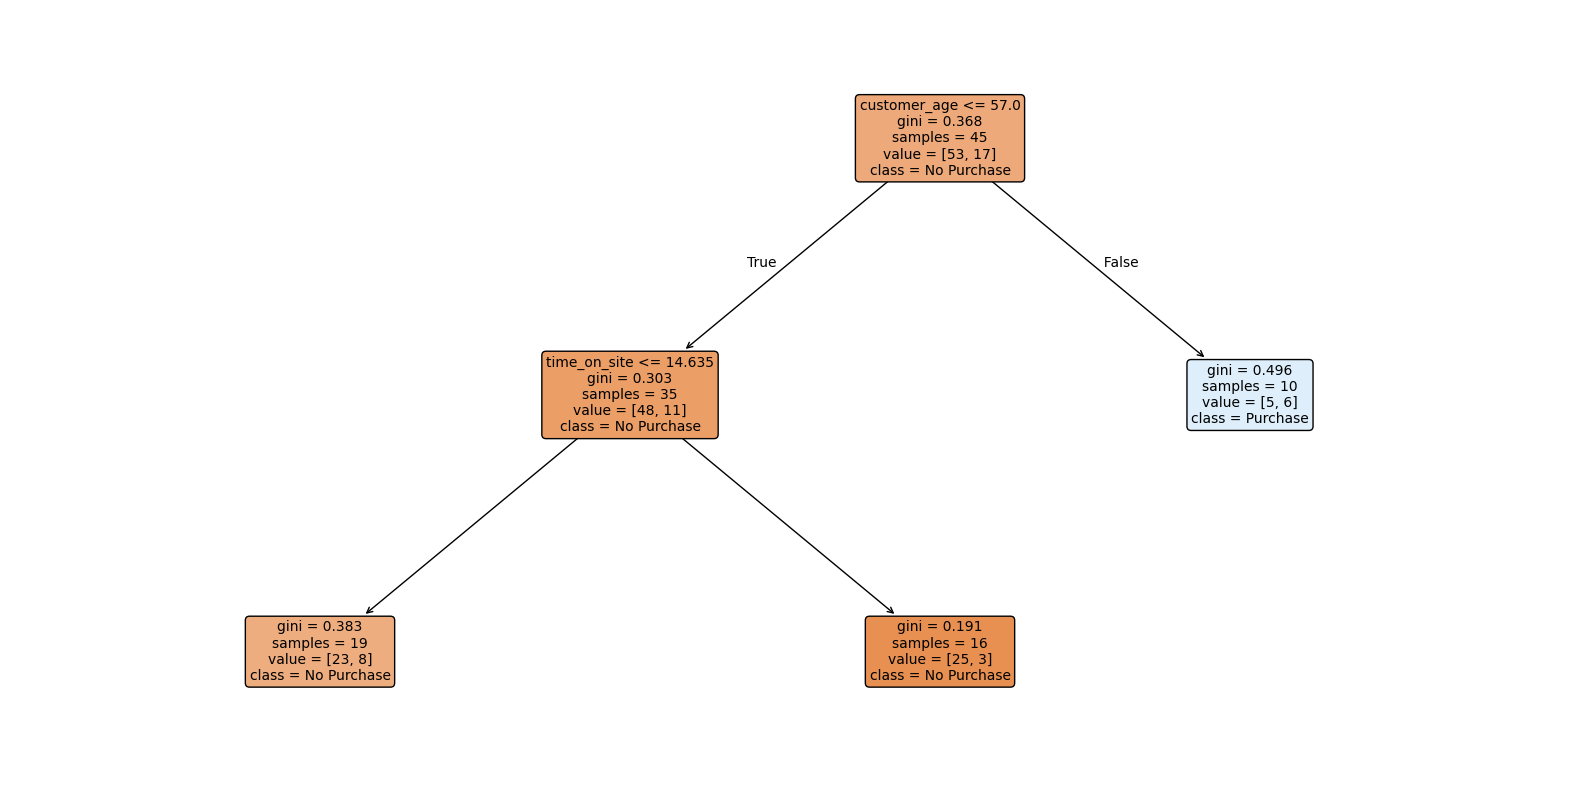

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    rf_best.estimators_[5],
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


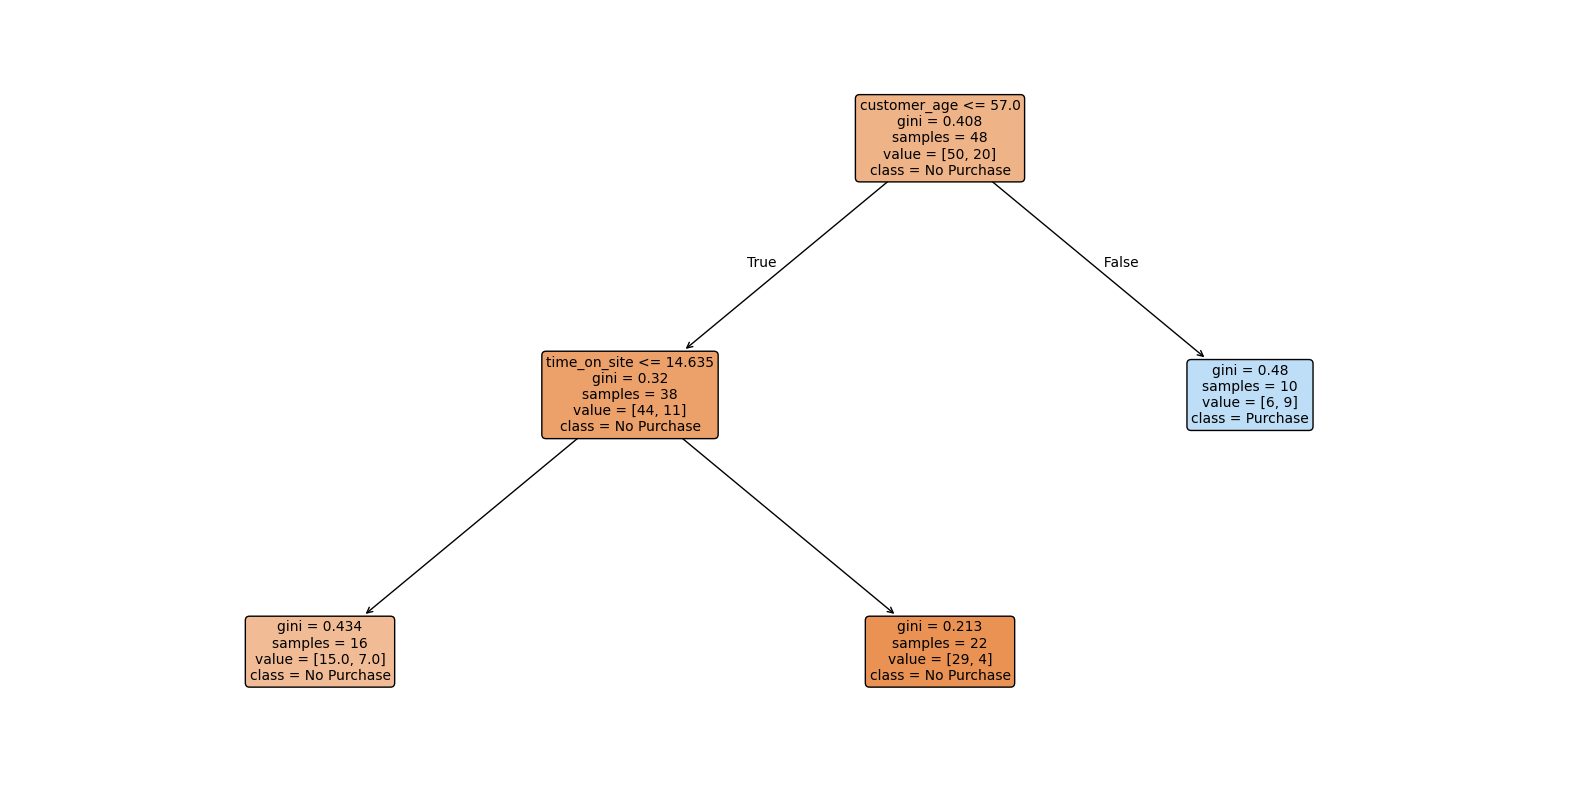

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    rf_best.estimators_[7],
    feature_names=X.columns,
    class_names=['No Purchase', 'Purchase'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


### The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

### Now let’s sort the data with the help of feature importance

In [19]:
rf_best.feature_importances_


array([0.27572425, 0.3916449 , 0.00092586, 0.29102161, 0.04068338])

In [20]:
## feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [21]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
1,gender,0.391645
3,time_on_site,0.291022
0,customer_age,0.275724
4,device_type,0.040683
2,pages_viewed,0.000926
